In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('data/ml_source_files/Kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [21]:
# Kyphosis 질병유무 
# age - 기간, number - 신체숫자값 , start - 증상 시작 시점 .. 

In [22]:
y = df['Kyphosis'] # 예측대상, target, label,y 
x = df.drop(['Kyphosis'],axis=1)  #input 

In [23]:
# 데이터가 있으면 인풋값과 라벨이있어야함 y= 정답 그래야 트레인할수있음. 

In [24]:
df.info() #머신러닝돌리기에 너무 작은양의 데이터.. (양질의데이터가많아야함..)
#근데 최근에는 스몰데이터를 갖고도 잘 할수있다는말이있음..(?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [25]:
# train test data split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=111)

In [26]:
# algorithm improt 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [27]:
# algorithm train (트레인할땐 트레인데이터사용)

In [28]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
# model prediction 

In [30]:
preds = tree.predict(x_test)

In [31]:
# 분류모델에선 컨퓨전매트릭스를 통해 평가지표를 사용 
# model evaluation 
# classification evaluation : accuracy, precision, recall, f1_score, roc_score

In [32]:
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score
print(classification_report(y_test,preds))
#y_test의 실제값, 모델이 예측한값을 넣어서 비교해서 성과를 봄 

              precision    recall  f1-score   support

      absent       1.00      0.88      0.93        16
     present       0.33      1.00      0.50         1

    accuracy                           0.88        17
   macro avg       0.67      0.94      0.72        17
weighted avg       0.96      0.88      0.91        17



In [45]:
from sklearn.tree import plot_tree #인사이트를 뽑긴힘들지만 그림을 그려볼수있는 장점이있음

<function matplotlib.pyplot.show(close=None, block=None)>

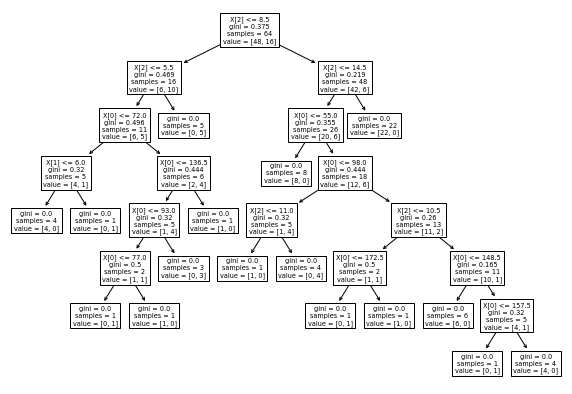

In [49]:
plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show

In [33]:
# ensemble : RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 500)

In [38]:
rfc.fit(x_train,y_train)
preds_rfc = rfc.predict(x_test)
print(classification_report(y_test,preds_rfc))

              precision    recall  f1-score   support

      absent       1.00      0.94      0.97        16
     present       0.50      1.00      0.67         1

    accuracy                           0.94        17
   macro avg       0.75      0.97      0.82        17
weighted avg       0.97      0.94      0.95        17



In [41]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [42]:
tree.feature_importances_ #각 피쳐가 얼마나 중요한지 피쳐값을 알려줌

array([0.45495338, 0.06666667, 0.47837995])

In [43]:
rfc.feature_importances_ # start가 가장 중요하다고 알려주고있음.. 

array([0.3665628, 0.2519109, 0.3815263])